# Pandas 4
Sean Wade

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [2]:
%matplotlib inline

## Problem 1

In [11]:
DJIA = pd.Series.from_csv('DJIA.csv')
DJIA = DJIA.replace(to_replace='.', value=np.nan)
DJIA = DJIA[1:].astype(np.float64)
DJIA.index = pd.to_datetime(DJIA.index)
DJIA.head()

2006-09-27    11689.24
2006-09-28    11718.45
2006-09-29    11679.07
2006-10-02    11670.35
2006-10-03    11727.34
dtype: float64

In [12]:
#DJIA = pd.read_csv('DJIA.csv', index_col=0)
#DJIA = DJIA.convert_objects(convert_numeric=True)
#DJIA.index = pd.to_datetime(DJIA.index)
#DJIA.head()

## Problem 2

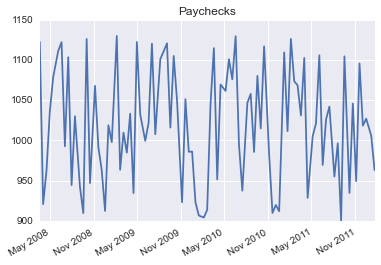

In [17]:
payData = pd.Series.from_csv('paychecks.csv', index_col=False)
dateTime1 = pd.date_range(start='3/13/2008', periods=94/2, freq="WOM-3FRI" )
dateTime2 = pd.date_range(start='3/13/2008', periods=94/2, freq="WOM-1FRI" )
timeIndex = dateTime1.union(dateTime2)[:93]
paySeries = pd.Series(payData.values, index=timeIndex)
paySeries = paySeries.astype(np.float64)
paySeries.plot(title="Paychecks"); plt.show()

## Problem 3

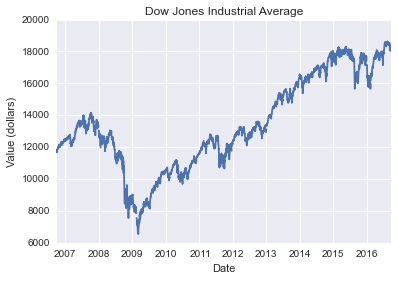

In [18]:
DJIA.plot(title="Dow Jones Industrial Average")
plt.xlabel("Date"); plt.ylabel("Value (dollars)")
plt.show()

## Problem 4

In [19]:
finances = pd.read_csv('finances.csv')
finances.index = pd.period_range(start='1978-09', end='2016-10', freq='Q-SEP')[:84]
finances.head()

EARNINGS   EXPENSES
1978Q4  372572.16  122611.27
1979Q1  419440.58  133176.18
1979Q2  419766.49  154670.69
1979Q3  361453.31  209360.42
1979Q4  354463.33  174147.13

## Problem 5

In [20]:
website = pd.read_csv('website_traffic.csv')
website.head()
website['ENTER'] = pd.to_datetime(website['ENTER'])
website['LEAVE'] = pd.to_datetime(website['LEAVE'])
website['Duration'] = website['LEAVE'] - website['ENTER']

In [21]:
print "The average visit time is: {}".format(website['Duration'].mean())

The average visit time is: 0 days 00:05:04.731647


In [22]:
website.index = pd.to_datetime(website['ENTER'])
website.resample('1H', how = 'count')['ENTER'].head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


ENTER
2016-10-07 01:00:00    618
2016-10-07 02:00:00    655
2016-10-07 03:00:00    670
2016-10-07 04:00:00    632
2016-10-07 05:00:00    672
Freq: H, Name: ENTER, dtype: int64

## Problem 6

In [28]:
day_gain = DJIA - DJIA.shift(1)
month_val = DJIA.resample('MS', label='left').first()
month_gain = month_val - month_val.shift(1)
day_gain = day_gain.fillna(0)
month_gain = month_gain.fillna(0)

print "The day with the largest gain: {}".format(day_gain.idxmax())
print "The day with the largest loss: {}".format(day_gain.idxmin())
print "The month with the largest gain: {}".format(month_gain.idxmax())
print "The month with the largest loss: {}".format(month_gain.idxmin())

The day with the largest gain: 2008-10-13 00:00:00
The day with the largest loss: 2008-09-29 00:00:00
The month with the largest gain: 2015-11-01 00:00:00
The month with the largest loss: 2015-09-01 00:00:00


## Problem 7

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=30,center=False).mean()
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=365,center=False).mean()
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=30,min_periods=0,adjust=True).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=365,min_periods=0

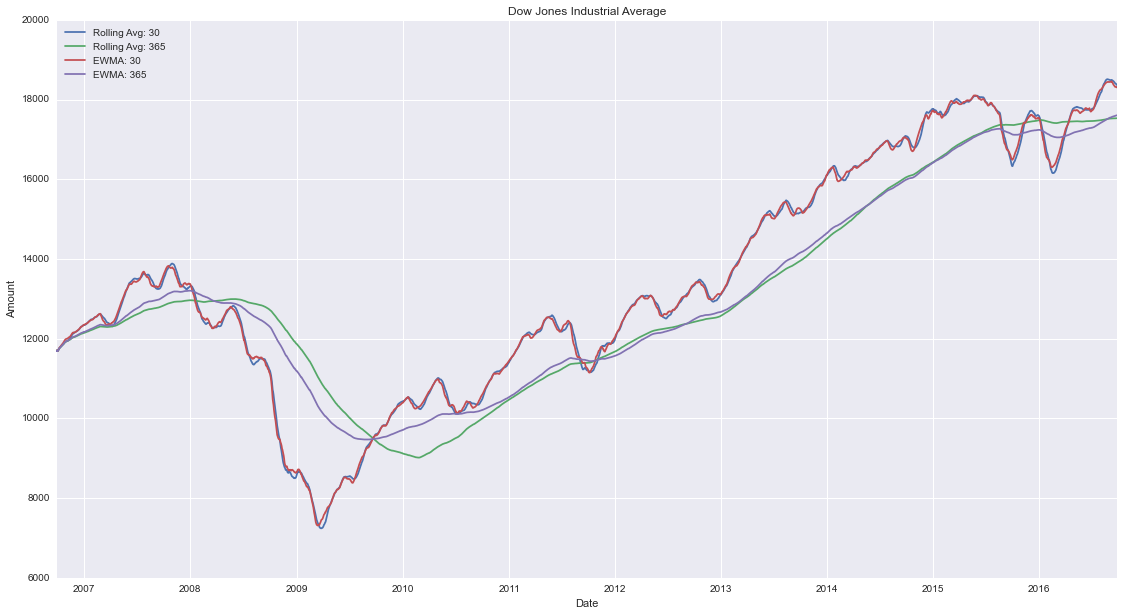

In [24]:
ax = plt.gca()
pd.rolling_mean(DJIA, window=30, min_periods=1).plot(ax=ax, figsize=(19,10))
pd.rolling_mean(DJIA, window=365, min_periods=1).plot(ax=ax)
pd.ewma(DJIA, span=30).plot(ax=ax)
pd.ewma(DJIA, span=365).plot(ax=ax)
ax.legend(["Rolling Avg: 30", "Rolling Avg: 365","EWMA: 30","EWMA: 365"], loc=2)
plt.title("Dow Jones Industrial Average")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.show()